In [1]:
from typing import Set


from solver import BTSPSolverSAT
from util import random_points, draw_edges, export_instance, import_instance, suppress_stdout

In [2]:
%load_ext autoreload
%autoreload 2

New best bottleneck: 3622.4015514572648!
The bottleneck 3475.8207663802227 is infeasible!
The bottleneck 3604.102384783207 is infeasible!
The bottleneck 3620.370837359068 is infeasible!
Time taken: 0.0006072999999999773


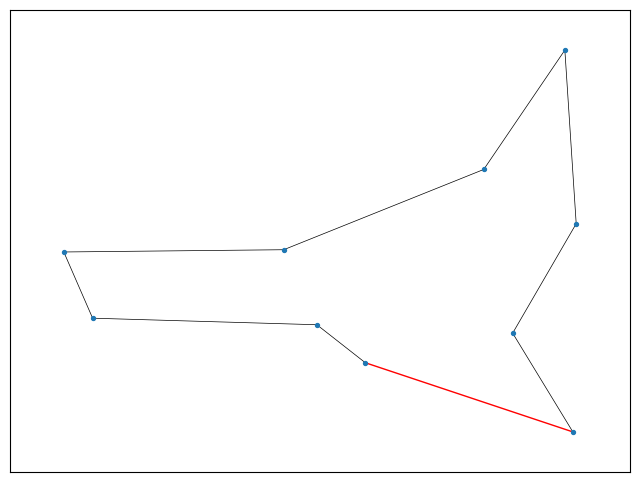

In [3]:
points = import_instance("10.json")
solver = BTSPSolverSAT(points, 2)
edges, time_taken = solver.solve(0)
print("Time taken: " + str(time_taken))
draw_edges(edges)

In [4]:
for i in range(5,16):
    export_instance(str(i)+".json",random_points(i))

# Benchmarks

In [5]:
def benchmark(points):
    solver = BTSPSolverSAT(points, 2)
    with suppress_stdout():
        edges, time_taken = solver.solve(0)
    print("Method: Binary Search; Time taken: " + str(time_taken))

    with suppress_stdout():
        edges, time_taken = solver.solve(1)
    print("Method: Linear Search Descending; Time taken: " + str(time_taken))

    with suppress_stdout():
        edges, time_taken = solver.solve(2)
    print("Method: Linear Search Ascending; Time taken: " + str(time_taken))

In [6]:
benchmark(import_instance("14.json"))

Method: Binary Search; Time taken: 0.49670279999999956
Method: Linear Search Descending; Time taken: 0.5163880000000001
Method: Linear Search Ascending; Time taken: 0.5191923999999997


In [ ]:
import signal
import time

def timeout(signum, frame):
    print('Signal handler called with signal',
          signum)
    raise OSError("timeout exceeded!")

def benchmark_time():
    signal.signal(signal.SIGALRM, timeout)

    signal.alarm(60)
    start = time.time()
    num_points = 1
    try:
        while True:
            print(f'Points: {num_points}')
            solver = BTSPSolverSAT(random_points(i), 2)
            # Use binary search as it is most performant
            solver.solve(0)
            num_points += 1
    except OSError as e:
        print(e)
    signal.alarm(0)
    print(f'Biggest instance to solve in under 60 sec: {num_points - 1}')

benchmark_time()

Points: 1
New best bottleneck: 5614.5429021426135!
The bottleneck 3881.7038784533784 is infeasible!
New best bottleneck: 4668.609321843069!
The bottleneck 4227.037378590353 is infeasible!
New best bottleneck: 4358.02822386455!
The bottleneck 4334.134284952417 is infeasible!
Points: 2
New best bottleneck: 5627.6817607252815!
The bottleneck 3763.644643161732 is infeasible!
New best bottleneck: 4131.041636197825!
The bottleneck 3914.8407375013353 is infeasible!
The bottleneck 3998.394802917791 is infeasible!
The bottleneck 4121.367370181892 is infeasible!
Points: 3
New best bottleneck: 5205.247352431967!
The bottleneck 4328.462313570491 is infeasible!
New best bottleneck: 4692.483883829544!
The bottleneck 4504.66114152885 is infeasible!
New best bottleneck: 4639.188291069893!
The bottleneck 4562.924610378743 is infeasible!
Points: 4
New best bottleneck: 5171.278855370304!
The bottleneck 3838.8859060930686 is infeasible!
New best bottleneck: 3955.793346472993!
The bottleneck 3909.847183714